# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning (25 points)

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing (25 points)

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering (30)

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores (20)

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data.csv")
print(df.shape)
df.head(10)

(1001, 30)


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
5,5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,...,6,0,0,0,0,0,0,3,11,0
6,6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,...,6,0,0,0,0,0,0,3,11,0
7,7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,...,8,0,0,0,0,0,0,3,11,0
8,8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,...,9,0,0,0,0,0,0,3,11,1
9,9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,...,20,1,0,0,0,0,0,3,11,0


In [3]:
#we should check null values
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 13
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
#we have some missing values in only income column. we can full mean values 
df["Income"].fillna(df["Income"].mean(),inplace=True)

In [5]:
df.isnull().sum()
#so there is no missing value

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
for i in df.columns:#we check column's unique values
    print(df[i].nunique())
pd.Series(df.columns, name='P').nunique()

1001
1001
58
5
6
938
3
3
516
100
500
132
396
151
146
177
14
13
14
14
13
2
2
2
2
2
2
1
1
2


30

In [7]:
#we can see Z_CostContact and Z_Revenue column have only  a value all rows. So we should drop. And also we can see first two column
#have all different values all rows. we cannot use these columns for clustering so we drop
df.drop(columns=["Unnamed: 0","ID","Z_CostContact","Z_Revenue"],inplace=True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [8]:
df.drop_duplicates(inplace=True)#if we have same data in our dataset, we should drop them
df.shape

(966, 26)

In [9]:
pd.Series(df.columns, name='P').nunique() #Lets control number of unique columns

26

In [10]:
#as a result,we cleaned all data

In [11]:
#DATA PREPROCESSİNG
#we have some nonnumerical columns. These are education and marital_status.we have to convert them to numeric data
#for k-means algorithm
print(df.dtypes)
print(df["Marital_Status"].unique())
print(df["Education"].unique())

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [12]:
df['Education']. replace({'Graduation':0 ,'PhD':1, 'Master':2 ,'Basic':3 ,'2n Cycle':4},inplace=True)
df["Marital_Status"].replace({'Single':0, 'Together':1, 'Married':2, 'Divorced':3, 'Widow':4, 'Alone':5},inplace=True)
df.head() 

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,0,0,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,0,0,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,0,1,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,0,1,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,1,2,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [13]:
#then we must also convert object and float type data to numeric data
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]).dt.strftime("%Y%m%d")
df=df.astype({"Income":int,"Dt_Customer":int})
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,0,0,58138,0,0,20120409,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,0,0,46344,1,1,20140803,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,0,1,71613,0,0,20130821,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,0,1,26646,1,0,20141002,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,1,2,58293,1,0,20140119,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [14]:
df.dtypes   
#now there are all integer types

Year_Birth             int64
Education              int64
Marital_Status         int64
Income                 int32
Kidhome                int64
Teenhome               int64
Dt_Customer            int32
Recency                int64
MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
AcceptedCmp3           int64
AcceptedCmp4           int64
AcceptedCmp5           int64
AcceptedCmp1           int64
AcceptedCmp2           int64
Complain               int64
Response               int64
dtype: object

In [15]:
#Normalizing
#We use standardScaler() to normalize our dataset.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_df = scaler.fit_transform(df)
df_scaled = pd.DataFrame(Scaled_df,columns=df.columns)
df_scaled.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-0.954315,-0.780947,-1.375659,0.256443,-0.822393,-0.871522,-1.589621,0.321851,0.974363,1.580319,...,2.340741,-0.568570,0.729871,-0.257343,-0.288027,-0.268593,-0.261886,-0.116795,-0.091382,2.535896
1,-1.196806,-0.780947,-1.375659,-0.284914,0.979040,0.931241,1.506838,-0.373771,-0.880591,-0.621856,...,-0.568122,-1.185346,-0.098631,-0.257343,-0.288027,-0.268593,-0.261886,-0.116795,-0.091382,-0.394338
2,-0.307674,-0.780947,-0.454101,0.874960,-0.822393,-0.871522,-0.008748,-0.791144,0.353072,0.593137,...,-0.244915,1.281757,-0.512882,-0.257343,-0.288027,-0.268593,-0.261886,-0.116795,-0.091382,-0.394338
3,1.228101,-0.780947,-0.454101,-1.189072,0.979040,-0.871522,1.537052,-0.791144,-0.880591,-0.545919,...,-0.891328,-0.568570,0.315620,-0.257343,-0.288027,-0.268593,-0.261886,-0.116795,-0.091382,-0.394338
4,0.985610,0.025030,0.467457,0.263558,0.979040,-0.871522,1.402985,1.573971,-0.399016,0.441263,...,0.078292,0.048206,-0.098631,-0.257343,-0.288027,-0.268593,-0.261886,-0.116795,-0.091382,-0.394338


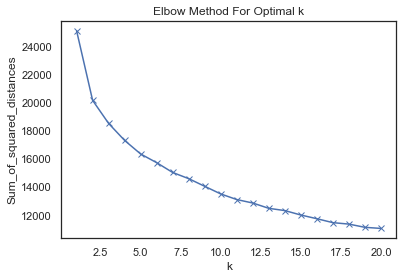

In [16]:
#to pick optimal k value. we use Elbow method
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
for k in range(1,21):
    km = KMeans(n_clusters=k)
    km = km.fit(Scaled_df)
    Sum_of_squared_distances.append(km.inertia_)
#Elbow Curve
plt.plot(range(1,21), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
#Next step is to convert our dataset from multidimensions to 2 dimensions.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(Scaled_df)
results=pd.DataFrame(data,columns=["pca1","pca2"])

In [18]:
#we choose 2 as the best k value
#Kmeans clustering
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans=kmeans.fit_predict(Scaled_df)

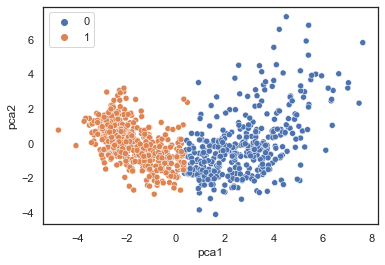

In [19]:
#Kmeans clustering plot
sns.scatterplot(x="pca1",y="pca2",hue=kmeans,data=results)
plt.show()

In [20]:
#As we see, we acquired two sets of data divided well

In [21]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=2)
cluster=cluster.fit_predict(Scaled_df)

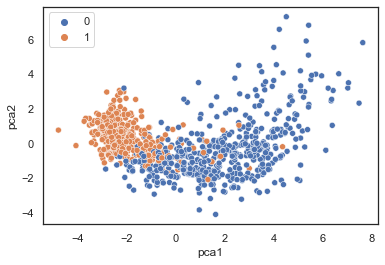

In [22]:
#Agglomerative Clustering plot
sns.scatterplot(x="pca1",y="pca2",hue=cluster,data=results)
plt.show()

In [23]:
#Here, we also acquired a data set of two, but the result we got with k mins clusturing was better

In [24]:
#Silhouette Coefficient
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,21):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(Scaled_df)
    centers = km.cluster_centers_

    score = silhouette_score(Scaled_df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.22223924336196307
For n_clusters = 3, silhouette score is 0.14354067794457573
For n_clusters = 4, silhouette score is 0.15225501194050384
For n_clusters = 5, silhouette score is 0.15909231136160729
For n_clusters = 6, silhouette score is 0.16504896680043127
For n_clusters = 7, silhouette score is 0.10162158349033788
For n_clusters = 8, silhouette score is 0.09608278404249222
For n_clusters = 9, silhouette score is 0.1381779461539462
For n_clusters = 10, silhouette score is 0.10173325571348188
For n_clusters = 11, silhouette score is 0.11201869972284556
For n_clusters = 12, silhouette score is 0.11071313357461167
For n_clusters = 13, silhouette score is 0.1137765904457811
For n_clusters = 14, silhouette score is 0.11092005177361085
For n_clusters = 15, silhouette score is 0.10234490518534828
For n_clusters = 16, silhouette score is 0.10525293575848173
For n_clusters = 17, silhouette score is 0.10704612178386162
For n_clusters = 18, silhouette sc

In [25]:
#For a data point X, score S is:
#A = average distance to other points in cluster. 
#B = average distance to points in closest cluster.
#S = (B - A) / max(A, B)

#From these results, we see that the average distance to points in closest cluster is more than the average distance
#to other points in cluster.This indicates that it is well clustered.

In [33]:
#conda install -c conda-forge yellowbrick

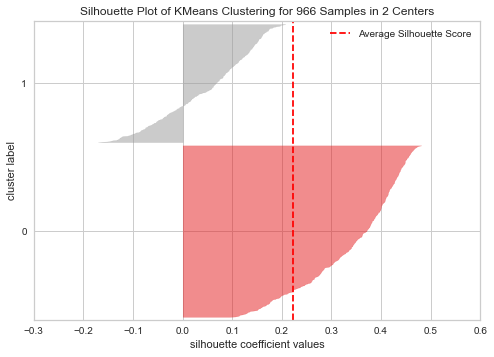

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 966 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=2)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(Scaled_df) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

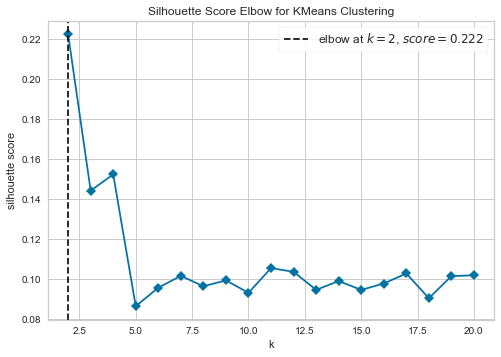

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=2)
visualizer = KElbowVisualizer(
    km, k=(2,21),metric ='silhouette', timings=False
)

visualizer.fit(Scaled_df) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data